In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)
df.head()

Price      Open      High       Low Change %
Date                                                       
2017-12-29  2,673.61  2,689.15  2,692.12  2,673.61   -0.52%
2017-12-28  2,687.54  2,686.10  2,687.66  2,682.69    0.18%
2017-12-27  2,682.62  2,682.10  2,685.64  2,678.91    0.08%
2017-12-26  2,680.50  2,679.09  2,682.74  2,677.96   -0.11%
2017-12-22  2,683.34  2,684.22  2,685.35  2,678.13   -0.05%

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3017 entries, 2017-12-29 to 2006-01-04
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     3017 non-null   object
 1   Open      3017 non-null   object
 2   High      3017 non-null   object
 3   Low       3017 non-null   object
 4   Change %  3017 non-null   object
dtypes: object(5)
memory usage: 141.4+ KB


In [13]:
df.describe()

Price      Open      High       Low Change %
count       3017      3017      3017      3017     3017
unique      2977      2980      2973      2985      554
top     1,271.50  1,270.84  1,413.09  1,274.86    0.08%
freq           2         2         2         3       29

In [14]:
df['Price'] = pd.to_numeric(df['Price'].str.replace(',',''))

In [15]:
df['Change %'] = pd.to_numeric(df['Change %'].str.replace('%',''))

In [16]:
df['Open'] = pd.to_numeric(df['Open'].str.replace(',',''))
df['High'] = pd.to_numeric(df['High'].str.replace(',',''))
df['Low'] = pd.to_numeric(df['Low'].str.replace(',',''))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3017 entries, 2017-12-29 to 2006-01-04
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3017 non-null   float64
 1   Open      3017 non-null   float64
 2   High      3017 non-null   float64
 3   Low       3017 non-null   float64
 4   Change %  3017 non-null   float64
dtypes: float64(5)
memory usage: 141.4 KB


In [18]:
df.describe()

Price         Open         High          Low     Change %
count  3017.000000  3017.000000  3017.000000  3017.000000  3017.000000
mean   1576.930597  1576.562337  1585.094839  1567.404445     0.032105
std     450.029412   449.869900   449.078688   450.705886     1.223285
min     676.530000   679.280000   695.270000   666.790000    -9.030000
25%    1266.690000  1266.670000  1274.560000  1259.420000    -0.390000
50%    1428.610000  1428.650000  1437.650000  1422.340000     0.060000
75%    1986.510000  1985.320000  1993.480000  1975.670000     0.540000
max    2690.160000  2692.710000  2694.970000  2685.920000    11.580000

In [21]:
df = df.sort_values(by='Date')

<AxesSubplot:xlabel='Date'>

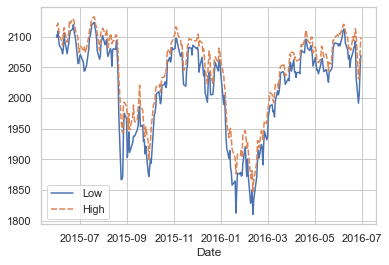

In [29]:
sns.set(style='whitegrid')
subset = df.query('Date>="2015-06-01" & Date<="2016-06-30"')[['Low','High']]
sns.lineplot(data=subset)

<AxesSubplot:ylabel='Density'>

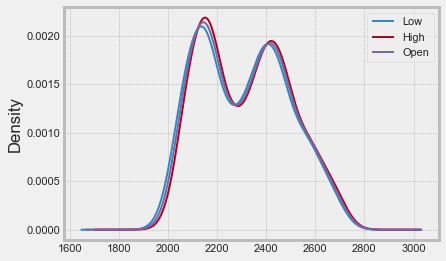

In [32]:
plt.style.use('bmh')
df.query('Date>="2016-04-01" & Date<="2018-03-31"')[['Low','High','Open']].plot.density()

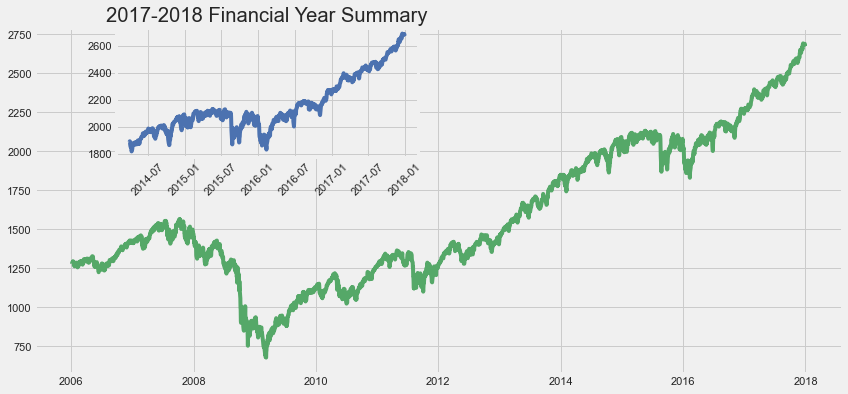

In [39]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(14, 6))

# left, bottom, width, height
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.18, 0.6, 0.3, 0.3])

x = df.index.date
y1 = df['Price']

axes1.plot(x, y1, 'g')
axes2.plot(df.query('Date>="2014-04-01" & Date<="2018-03-31"')['Price'], 'b')
plt.title('2017-2018 Financial Year Summary')
plt.xticks(rotation=45)

plt.show()

In [54]:
df_monthwise = df.groupby(pd.Grouper(freq="M")).mean()

In [62]:
df_monthwise = df_monthwise.reset_index()

In [64]:
df_monthwise['Date'] = df_monthwise['Date'].dt.to_period("M")

In [65]:
df_monthwise

Date        Price         Open         High          Low  Change %
0    2006-01  1279.250000  1278.653158  1283.589474  1274.167368  0.047895
1    2006-02  1276.645263  1276.616842  1281.536316  1271.135789  0.002632
2    2006-03  1293.734783  1293.123913  1298.765217  1288.788696  0.049565
3    2006-04  1302.165263  1301.777368  1307.992105  1296.158421  0.066316
4    2006-05  1290.013636  1291.740000  1297.076818  1284.194545 -0.138636
..       ...          ...          ...          ...          ...       ...
139  2017-08  2456.223043  2456.750000  2463.660870  2449.480870  0.003043
140  2017-09  2492.841000  2491.332500  2496.208000  2486.306500  0.096000
141  2017-10  2556.997273  2555.807273  2560.427727  2551.009091  0.099545
142  2017-11  2593.605714  2590.306190  2597.430000  2585.022381  0.132381
143  2017-12  2664.340500  2666.070000  2672.390000  2658.469000  0.049000

[144 rows x 6 columns]

In [66]:
df_monthwise.set_index('Date').sort_index()

Price         Open         High          Low  Change %
Date                                                                 
2006-01  1279.250000  1278.653158  1283.589474  1274.167368  0.047895
2006-02  1276.645263  1276.616842  1281.536316  1271.135789  0.002632
2006-03  1293.734783  1293.123913  1298.765217  1288.788696  0.049565
2006-04  1302.165263  1301.777368  1307.992105  1296.158421  0.066316
2006-05  1290.013636  1291.740000  1297.076818  1284.194545 -0.138636
...              ...          ...          ...          ...       ...
2017-08  2456.223043  2456.750000  2463.660870  2449.480870  0.003043
2017-09  2492.841000  2491.332500  2496.208000  2486.306500  0.096000
2017-10  2556.997273  2555.807273  2560.427727  2551.009091  0.099545
2017-11  2593.605714  2590.306190  2597.430000  2585.022381  0.132381
2017-12  2664.340500  2666.070000  2672.390000  2658.469000  0.049000

[144 rows x 5 columns]